In [22]:
import pandas as pd
import matplotlib.pyplot as plt

factors = ['Short_std', 'Lng_std', 'H/O', 'L/O', 'C/O', '%15Min_wav', '%Hour_wav', '%Day_wav', '%5Day_wav', '%S hort_std', '%Lng_std']
# count +1+2+3 consecutive closes
# atr
# displacement - current close less moving average for different time frames (% and atr terms)
df = pd.read_csv('data\AAPL_2020-03-24_2022-02-12_1min_Processed.csv').dropna()
df.describe()

,open,high,low,close,volume,TP,Short_std,Lng_std,15Min_wav,Hour_wav,...,H/O,L/O,C/O,%15Min_wav,%Hour_wav,%Day_wav,%5Day_wav,%Short_std,%Lng_std,return
count,398286.000000,398286.000000,398286.000000,398286.000000,3.982860e+05,398286.000000,398286.000000,398286.000000,398286.000000,398286.000000,...,398286.000000,398286.000000,398286.000000,398286.000000,398286.000000,398286.000000,398286.000000,398286.000000,398286.000000,398286.000000
mean,129.030553,129.077623,128.983564,129.030276,1.278673e+05,129.030580,0.144571,4.501596,129.028431,129.022834,...,1.000371,0.999631,0.999998,0.000035,0.000149,0.003719,0.018906,0.497886,0.086377,0.000449
std,26.992867,26.999935,26.985552,26.992796,2.429381e+05,26.992706,0.143209,1.685196,26.993754,26.996596,...,0.000823,0.000648,0.000703,0.001804,0.003857,0.019675,0.042364,2.727317,0.428700,0.008149
min,59.471452,59.483783,59.471452,59.483783,1.000000e+02,59.482139,0.003946,1.432883,59.491290,59.515180,...,1.000000,0.958005,0.965844,-0.032872,-0.043651,-0.084552,-0.085568,-0.974737,-0.397781,-0.058751
25%,115.315655,115.351046,115.261712,115.317503,2.343000e+03,115.316349,0.060143,3.306033,115.318532,115.312189,...,1.000000,0.999521,0.999786,-0.000625,-0.001465,-0.008704,-0.009780,-0.397206,-0.217905,-0.003543
50%,128.602371,128.661928,128.556560,128.604484,3.341850e+04,128.604484,0.104977,4.033419,128.611309,128.621352,...,1.000167,0.999833,1.000000,0.000024,0.000132,0.004305,0.019858,-0.051210,-0.004907,0.000521
75%,147.723386,147.753259,147.686478,147.722835,1.793865e+05,147.721481,0.178772,5.329302,147.726029,147.717834,...,1.000474,1.000000,1.000219,0.000726,0.001869,0.014716,0.047759,0.554948,0.234605,0.004669
max,183.146273,183.146273,183.126299,183.126299,1.798932e+07,183.132957,3.106585,10.242121,183.089754,182.909191,...,1.072578,1.000000,1.051587,0.030564,0.039916,0.106642,0.152736,146.242146,38.843897,0.060443


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

X = df[factors]
y = df['return']

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

model = XGBRegressor(learning_rate = 0.035, n_estimators=100) #random_state=0, learning_rate = rate, n_estimators=500
model.fit(X_train, y_train, 
            eval_set=[(X_valid, y_valid)],
            verbose=False,
            eval_metric='mae')
predictions = model.predict(X_valid)

mean_absolute_error(predictions, y_valid)

C:\Users\kaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


0.014463797814188753

In [85]:
df2 = pd.read_csv('data\TSLA_2020-03-01_2022-01-20_1min_Processed.csv').dropna()
df2
pred = model.predict(df2[factors])
real = list(df2['return'])
mean_absolute_error(pred, real)

0.014284488411260801

In [86]:
count = 0
for i in range(len(pred)):
    if pred[i] > 0 and real[i] > 0:
        count+= 1
    elif pred[i] < 0 and real[i] < 0:
        count += 1

print(count/len(pred))

#hence gets sin right 54% of the time

0.5528597916372193


In [87]:
model.save_model("model_sklearn.json")

model2 = XGBRegressor()
model2.load_model("model_sklearn.json")

df3 = pd.read_csv('data\TSLA_2020-03-01_2022-01-20_1min_Processed.csv').dropna()

p = model2.predict(df3[factors])
r = df3['return']
mean_absolute_error(p, r)

0.014284488411260801

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

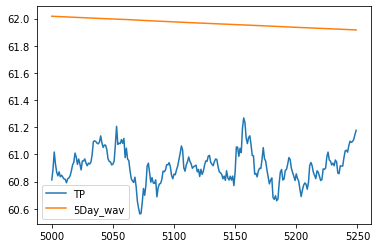

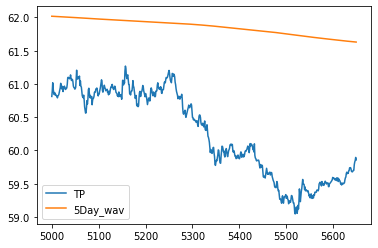

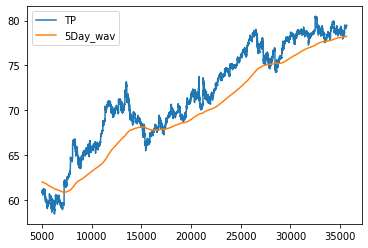

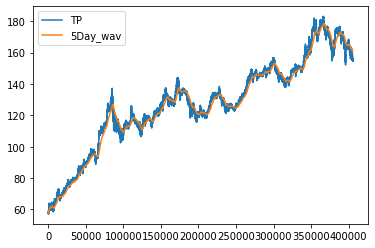

In [5]:
df = pd.read_csv('data\AAPL_2020-03-24_2022-02-12_1min_Processed.csv')[['TP','5Day_wav']]
plt.figure()

df.iloc[5000:5250].plot()
df.iloc[5000:5650].plot()
df.iloc[5000:35650].plot()
df.plot()